# Lead Scoring Case Study

In [189]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [191]:
# Load data
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [192]:
# Shape of dataframe
leads.shape

(9240, 37)

In [193]:
# Info
leads.info() #looks like there are missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [194]:
# How is the data distributed?
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [195]:
# Missing values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [196]:
# Two columns are like keys of the table which do not contain useful information for us, so we drop them
leads1 = leads.drop(['Prospect ID','Lead Number'], axis=1)

In [197]:
# Viewing the changes
leads1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [198]:
# Percentage of missing values
(leads1.isnull().sum()/leads1.shape[0])*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [199]:
# Drop columns with more than 40% missing values
cols_to_drop = ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
leads2 = leads1.drop(cols_to_drop, axis=1)

In [200]:
# Missing value percentage
(leads2.isnull().sum()/leads2.shape[0])*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [201]:
# Working on the Tags column
leads2['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [202]:
# Reducing the number of values under the 'Tags' category
leads2['Tags'] = leads2['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized', 'switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA','Closed by Horizzon'], 'Other')
leads2['Tags'] = leads2['Tags'].replace(np.nan,'Unknown')

In [203]:
# Percentage of missing values
(leads2.isnull().sum()/leads2.shape[0])*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [204]:
# Looking at the values in 'What matters most to you in choosing a course'
leads2['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [205]:
# Impute missing values with the most occuring value
leads2['What matters most to you in choosing a course'] = leads2['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
leads2['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [206]:
# It is clear that almost all the people prefer Better Career Prospects. So we drop this column because there is no useful information
leads3 = leads2.drop('What matters most to you in choosing a course', axis=1)
leads3.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [207]:
# Percentage of missing values
(leads3.isnull().sum()/leads3.shape[0])*100

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Country                                     26.634199
Specialization                              15.562771
How did you hear about X Education          23.885281
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement       

In [208]:
# Looking at values under Lead Profile
leads3['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [209]:
# The Select value means that candidate has not chosen anything. So they are really missing values
leads3['Lead Profile'] = leads3['Lead Profile'].replace('Select',np.nan)
leads3['Lead Profile'].value_counts(dropna=False) # viewing changes

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [210]:
# Percentage of missing values
(leads3.isnull().sum()/leads3.shape[0])*100

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Country                                     26.634199
Specialization                              15.562771
How did you hear about X Education          23.885281
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement       

In [211]:
# Drop the column because of high percentage of missing values
leads4 = leads3.drop('Lead Profile', axis=1)
leads4.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [212]:
# Percentage of missing values
(leads4.isnull().sum()/leads4.shape[0])*100

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Country                                     26.634199
Specialization                              15.562771
How did you hear about X Education          23.885281
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement       

In [213]:
# What is the occupation of most visitors?
leads4['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [214]:
# Impute missing values with the most occuring value
leads4['What is your current occupation'] = leads4['What is your current occupation'].replace(np.nan,'Unemployed')

In [215]:
# Percentage of missing values
(leads4.isnull().sum()/leads4.shape[0])*100

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Country                                     26.634199
Specialization                              15.562771
How did you hear about X Education          23.885281
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement       

In [216]:
# Working with the Country column
leads4['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Germany                    4
Nigeria                    4
Kuwait                     4
Canada                     4
Sweden                     3
Uganda                     2
Philippines                2
Bangladesh                 2
China                      2
Italy                      2
Belgium                    2
Asia/Pacific Region        2
Ghana                      2
Netherlands                2
Russia                     1
Indonesia                  1
Vietnam                    1
Liberia                    1
Sri Lanka                  1
Switzerland   

In [217]:
# Impute missing value with the most occuring value
leads4['Country'] = leads4['Country'].replace(np.nan,'India')

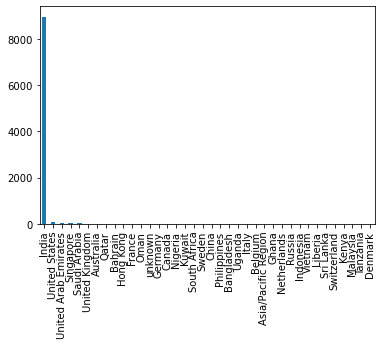

In [218]:
# Visualizing the data
leads4['Country'].value_counts().plot.bar()
plt.show()

In [219]:
# It is clear that India is the value for more than 96% of the column Country. So we drop the column due to lack of useful information
leads5 = leads4.drop('Country', axis=1)
leads5.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [220]:
# Percentage of missing values
(leads5.isnull().sum()/leads5.shape[0])*100

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                              15.562771
How did you hear about X Education          23.885281
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations     

In [221]:
# Looking at the values of How did you hear about X Education column
leads5['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [222]:
# Make Select as missing value
leads5['How did you hear about X Education'] = leads5['How did you hear about X Education'].replace('Select',np.nan)
# After making 'Select' as missing, we will see the null value percentage of this column. If greater than 40, we will have to drop it.
(leads5.isnull().sum()/leads5.shape[0])*100

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                              15.562771
How did you hear about X Education          78.463203
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations     

In [223]:
# We see that this column has 78% missing values, so we drop it
leads6 = leads5.drop('How did you hear about X Education', axis=1)
leads6.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [224]:
# Percentage of missing values
(leads6.isnull().sum()/leads6.shape[0])*100

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                              15.562771
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About O

In [225]:
# Working with Specialization column
leads6['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [226]:
# Cleaning Specialization column. We make select as missing and create a new category called Unknown for missing values
leads6['Specialization'] = leads6['Specialization'].replace('Select', np.nan)
leads6['Specialization'] = leads6['Specialization'].replace(np.nan, 'Unknown')

In [227]:
# Reduce the number of categories under Specialization
leads6['Specialization'] = leads6['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'], 'Management')

In [228]:
# Percentage of missing values
leads6.isnull().sum()*100/leads6.shape[0]

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                               0.000000
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About O

In [229]:
# Values under City column
leads6['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [230]:
# Make select as missing and impute missing with the most occuring value
leads6['City'] = leads6['City'].replace('Select',np.nan)
leads6['City'] = leads6['City'].replace(np.nan, 'Mumbai')
leads6['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [231]:
# Percentage of missing values
leads6.isnull().sum()*100/leads6.shape[0]

Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

In [232]:
# Make select as missing and view the missing value percentage again
leads6 = leads6.replace('Select',np.nan)
leads6.isnull().sum()*100/leads6.shape[0]

Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

In [233]:
# Since there are very less percentages of missing values remaining(less than 2% per column), we can directly drop the records having missing values. It won't affect our model
leads6 = leads6.dropna()
leads6.isnull().sum()*100/leads6.shape[0]

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [234]:
# Viewing values under Lead Source
leads6['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
WeLearn                 1
blog                    1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [235]:
# Reduce the number of categories and clean google 
leads6['Lead Source'] = leads6['Lead Source'].replace('google', 'Google')
leads6['Lead Source'] = leads6['Lead Source'].replace(['Facebook','youtubechannel'], 'Social Media')
leads6['Lead Source'] = leads6['Lead Source'].replace(['bing','Click2call', 'Press_Release','Live Chat','NC_EDM', 'Pay per Click Ads', 'testone', 'welearnblog_Home', 'WeLearn', 'blog'],'Other')
leads6['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Social Media          34
Other                 20
Name: Lead Source, dtype: int64

In [236]:
# Values under Do Not Call column
leads6['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [237]:
# Dropping the column due to highly imbalanced data
leads7 = leads6.drop('Do Not Call', axis=1)
leads7.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [238]:
# Instead of checking every column one by one, let us see complete information and make decisions faster
for col in leads7.columns:
    print(leads7[col].value_counts())

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Social Media          34
Other                 20
Name: Lead Source, dtype: int64
No     8358
Yes     716
Name: Do Not Email, dtype: int64
0    5639
1    3435
Name: Converted, dtype: int64
0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1


In [239]:
# Looking at the above information, we can immediately drop some columns with imbalanced data
cols_to_drop = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque']
leads8 = leads7.drop(cols_to_drop, axis=1)
leads8.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [240]:
# Reduce the number of categories under Last Activity column
leads8['Last Activity'] = leads8['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 'Email Received', 'Email Marked Spam', 'Resubscribed to emails', 'Visited Booth in Tradeshow'], 'Other')
leads8['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Other                         191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [241]:
# Reduce the number of categories under Last Notable Activity column
leads8['Last Notable Activity'] = leads8['Last Notable Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 'Email Received', 'Email Marked Spam', 'Resubscribed to emails', 'Visited Booth in Tradeshow', 'Form Submitted on Website', 'Email Bounced'], 'Other')
leads8['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       158
Name: Last Notable Activity, dtype: int64

In [242]:
# Viewing info
leads8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [243]:
# Data imbalance of target variable
leads8['Converted'].mean()

0.3785541106458012

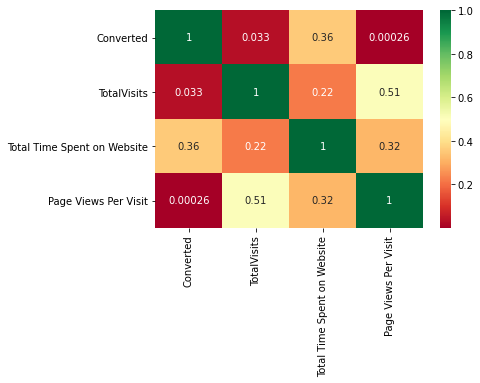

In [244]:
# Plot heatmap of correlation among numeric variables
sns.heatmap(leads8.corr(), annot=True, cmap='RdYlGn')
plt.show()

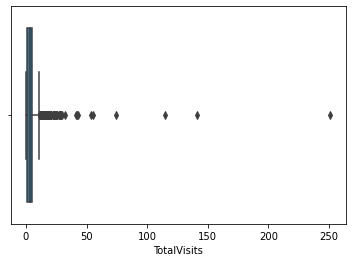

In [245]:
# Outliers in TotalVisits?
sns.boxplot('TotalVisits', data=leads8)
plt.show()

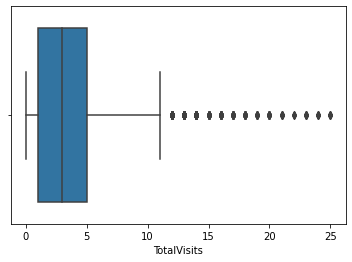

In [246]:
# Treating outliers by capping data
Q1 = leads8.TotalVisits.quantile(0.05) #5th percentile
Q3 = leads8.TotalVisits.quantile(0.95) #95th percentile
IQR = Q3-Q1
leads8 = leads8[(leads8.TotalVisits>=Q1-1.5*IQR) & (leads8.TotalVisits<=Q3+1.5*IQR)]
sns.boxplot('TotalVisits', data=leads8)
plt.show()

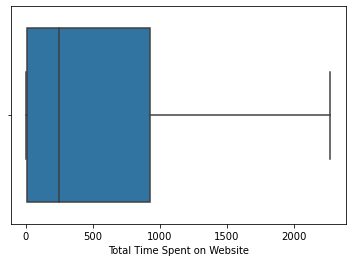

In [247]:
# Outliers in Total Time Spent on Website data?
sns.boxplot('Total Time Spent on Website', data=leads8)
plt.show() # no outliers

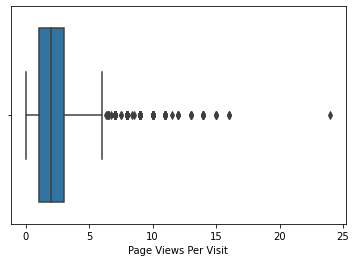

In [248]:
# Outliers check for Page Views Per Visit data
sns.boxplot('Page Views Per Visit', data=leads8)
plt.show()

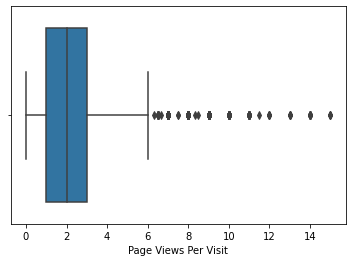

In [249]:
# Treating outliers under Page Views Per Visit column
Q1 = leads8['Page Views Per Visit'].quantile(0.05)
Q3 = leads8['Page Views Per Visit'].quantile(0.95)
IQR = Q3-Q1
leads8 = leads8[(leads8['Page Views Per Visit']>=Q1-1.5*IQR) & (leads8['Page Views Per Visit']<=Q3+1.5*IQR)]
sns.boxplot('Page Views Per Visit', data=leads8)
plt.show()

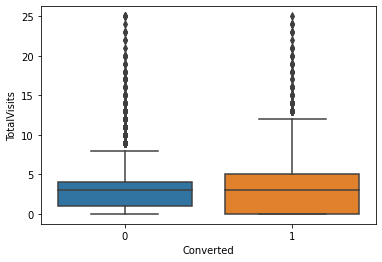

In [250]:
# Distribution of numeric variables w.r.t. target. Converted vs TotalVisits
sns.boxplot(x='Converted', y='TotalVisits', data=leads8)
plt.show() # nothing conclusive

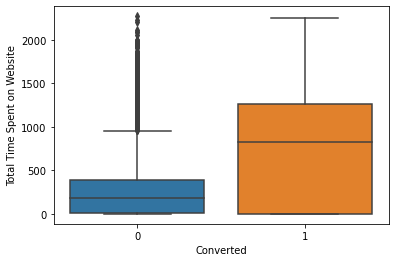

In [251]:
# Converted vs Total Time Spent on Website
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads8)
plt.show() # People spending more time on website have higher chances of conversion

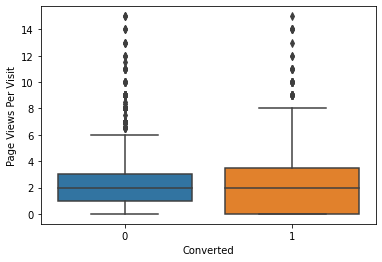

In [252]:
# Converted vs Page Views Per Visit
sns.boxplot(x='Converted', y='Page Views Per Visit', data=leads8)
plt.show() # nothing conclusive

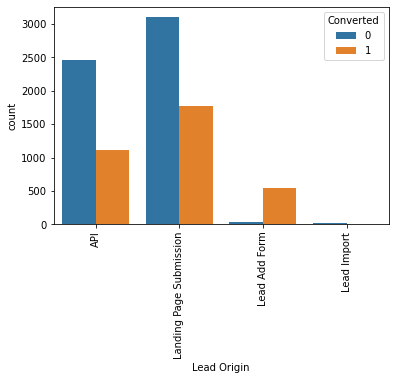

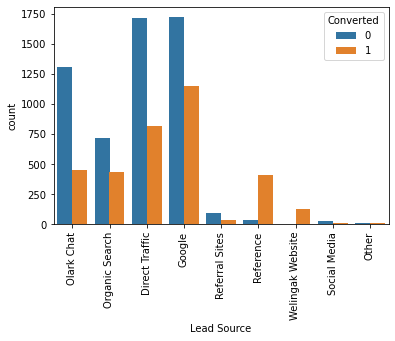

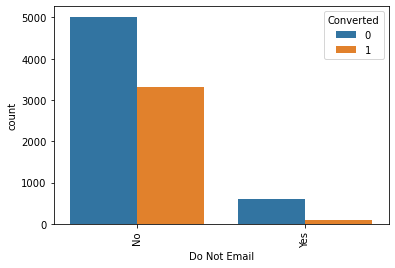

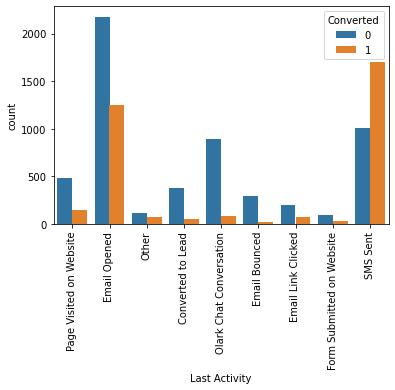

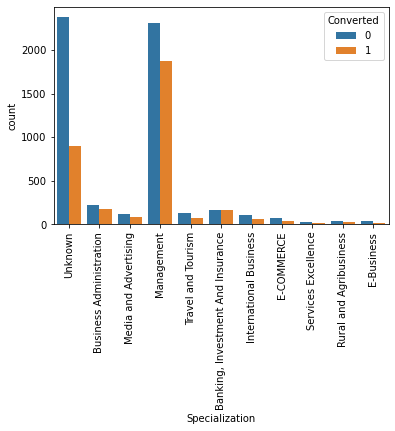

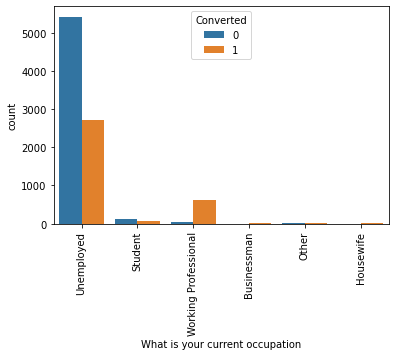

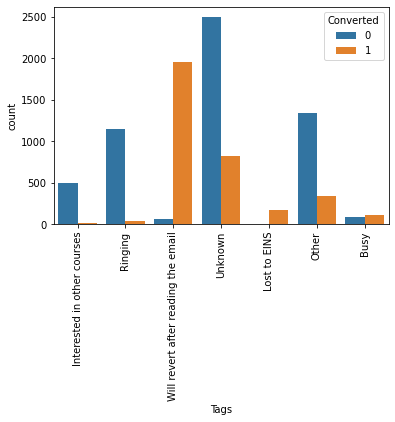

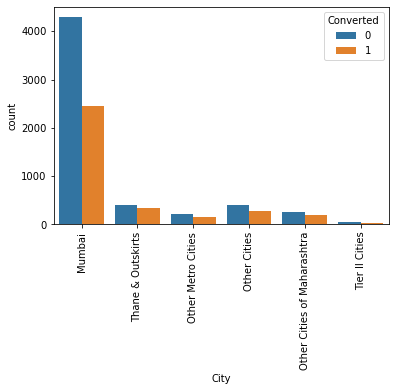

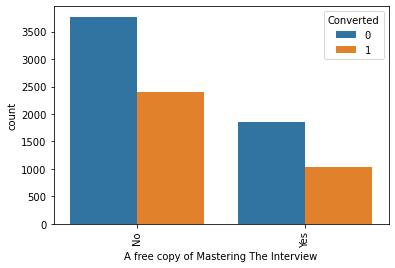

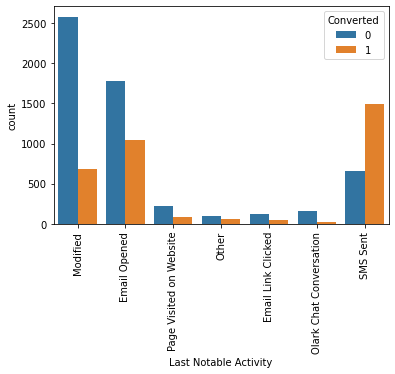

In [253]:
# Distribution of categorical variables w.r.t. target
categorical = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']
for col in categorical:
    sns.countplot(x=col, hue='Converted', data=leads8)
    plt.xticks(rotation=90)
    plt.show()

Conclusions:
- Lead Origin: Lead Add Form has highest conversion rate
- Lead Source: Reference and Welingak website have high conversion rates.
- Last Activity: SMS sent has highest conversion rate
- What is your current occupation: Working Professional have high conversion rate
- Tags: People reverting after reading the email have higher conversion rate.
- Last Notable Activity: Again, SMS sent has higher conversion.

In [254]:
# Mapping Binary values to 0 and 1
def bmap(x):
    return x.map({'Yes':1, 'No':0})
to_map = ['Do Not Email', 'A free copy of Mastering The Interview']
leads8[to_map] = leads8[to_map].apply(lambda x: bmap(x))
leads8[to_map]

,Do Not Email,A free copy of Mastering The Interview
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
9235,1,0
9236,0,1
9237,1,1
9238,0,0


### Creating dummy variables

In [255]:
# Creating dummy variables for those columns where which value is dropped doesn't matter
dummy = pd.get_dummies(leads8[['Lead Origin', 'What is your current occupation', 'City']], drop_first=True)
leads8 = pd.concat([leads8,dummy], axis=1)
leads8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9048 non-null   object 
 1   Lead Source                                           9048 non-null   object 
 2   Do Not Email                                          9048 non-null   int64  
 3   Converted                                             9048 non-null   int64  
 4   TotalVisits                                           9048 non-null   float64
 5   Total Time Spent on Website                           9048 non-null   int64  
 6   Page Views Per Visit                                  9048 non-null   float64
 7   Last Activity                                         9048 non-null   object 
 8   Specialization                                        9048

In [256]:
# Dumy variables for Specialization column
dummy = pd.get_dummies(leads8['Specialization'], prefix = 'Specialization')
dummy = dummy.drop(['Specialization_Unknown'], axis = 1)
leads8 = pd.concat([leads8, dummy], axis = 1)

In [257]:
# Viewing info
leads8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9048 non-null   object 
 1   Lead Source                                           9048 non-null   object 
 2   Do Not Email                                          9048 non-null   int64  
 3   Converted                                             9048 non-null   int64  
 4   TotalVisits                                           9048 non-null   float64
 5   Total Time Spent on Website                           9048 non-null   int64  
 6   Page Views Per Visit                                  9048 non-null   float64
 7   Last Activity                                         9048 non-null   object 
 8   Specialization                                        9048

In [258]:
# Dummy for Lead Source column
dummy = pd.get_dummies(leads8['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Other'], axis =1)
leads8 = pd.concat([leads8, dummy], axis = 1)

In [259]:
# Viewing info
leads8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 45 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9048 non-null   object 
 1   Lead Source                                           9048 non-null   object 
 2   Do Not Email                                          9048 non-null   int64  
 3   Converted                                             9048 non-null   int64  
 4   TotalVisits                                           9048 non-null   float64
 5   Total Time Spent on Website                           9048 non-null   int64  
 6   Page Views Per Visit                                  9048 non-null   float64
 7   Last Activity                                         9048 non-null   object 
 8   Specialization                                        9048

In [260]:
# Dummy variables for Last Activity
dummy = pd.get_dummies(leads8['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Other'], axis = 1)
leads8 = pd.concat([leads8, dummy], axis = 1)
leads8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9048 non-null   object 
 1   Lead Source                                           9048 non-null   object 
 2   Do Not Email                                          9048 non-null   int64  
 3   Converted                                             9048 non-null   int64  
 4   TotalVisits                                           9048 non-null   float64
 5   Total Time Spent on Website                           9048 non-null   int64  
 6   Page Views Per Visit                                  9048 non-null   float64
 7   Last Activity                                         9048 non-null   object 
 8   Specialization                                        9048

In [261]:
# Dummy variable for last notable activity
dummy = pd.get_dummies(leads8['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other'], axis = 1)
leads8 = pd.concat([leads8, dummy], axis = 1)
leads8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9048 non-null   object 
 1   Lead Source                                           9048 non-null   object 
 2   Do Not Email                                          9048 non-null   int64  
 3   Converted                                             9048 non-null   int64  
 4   TotalVisits                                           9048 non-null   float64
 5   Total Time Spent on Website                           9048 non-null   int64  
 6   Page Views Per Visit                                  9048 non-null   float64
 7   Last Activity                                         9048 non-null   object 
 8   Specialization                                        9048

In [262]:
# Dummy variables for Tags
dummy = pd.get_dummies(leads8['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Unknown'], axis = 1)
leads8 = pd.concat([leads8, dummy], axis = 1)
leads8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9048 non-null   object 
 1   Lead Source                                           9048 non-null   object 
 2   Do Not Email                                          9048 non-null   int64  
 3   Converted                                             9048 non-null   int64  
 4   TotalVisits                                           9048 non-null   float64
 5   Total Time Spent on Website                           9048 non-null   int64  
 6   Page Views Per Visit                                  9048 non-null   float64
 7   Last Activity                                         9048 non-null   object 
 8   Specialization                                        9048

In [263]:
# Drop categorical columns after making dummies
leads9 = leads8.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity'], axis = 1)
leads9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9048 non-null   int64  
 1   Converted                                             9048 non-null   int64  
 2   TotalVisits                                           9048 non-null   float64
 3   Total Time Spent on Website                           9048 non-null   int64  
 4   Page Views Per Visit                                  9048 non-null   float64
 5   A free copy of Mastering The Interview                9048 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9048 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9048 non-null   uint8  
 8   Lead Origin_Lead Import                               9048

### Model Building

In [264]:
# Extract y
y = leads9.pop('Converted')
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [265]:
# Extract X
X = leads9
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [266]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [267]:
# Viewing changes
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6333 entries, 8425 to 5769
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6333 non-null   int64  
 1   TotalVisits                                           6333 non-null   float64
 2   Total Time Spent on Website                           6333 non-null   int64  
 3   Page Views Per Visit                                  6333 non-null   float64
 4   A free copy of Mastering The Interview                6333 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6333 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6333 non-null   uint8  
 7   Lead Origin_Lead Import                               6333 non-null   uint8  
 8   What is your current occupation_Housewife             6

In [268]:
# Test X info
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2715 entries, 4462 to 2211
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2715 non-null   int64  
 1   TotalVisits                                           2715 non-null   float64
 2   Total Time Spent on Website                           2715 non-null   int64  
 3   Page Views Per Visit                                  2715 non-null   float64
 4   A free copy of Mastering The Interview                2715 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2715 non-null   uint8  
 6   Lead Origin_Lead Add Form                             2715 non-null   uint8  
 7   Lead Origin_Lead Import                               2715 non-null   uint8  
 8   What is your current occupation_Housewife             2

In [269]:
# Viewing y_train
y_train.head()

8425    0
8341    0
7376    0
7414    0
3521    1
Name: Converted, dtype: int64

In [270]:
# Viewing y_test
y_test.head()

4462    1
5243    0
4597    1
4680    1
5355    0
Name: Converted, dtype: int64

In [271]:
# Scaling the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email
8425,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8341,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7376,0,-0.402157,-0.071940,-0.165214,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7414,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3521,0,0.517288,1.213416,1.305648,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [272]:
# Use stats model and sklearn to build the model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
log = LogisticRegression()
rfe = RFE(log, 15) # generate 15 variables as output of feature selection
rfe = rfe.fit(X_train, y_train)

In [273]:
rfe_select = X_train.columns[rfe.support_]
rfe_select # those variables which rfe algorithm has selected

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [274]:
# Building the model and viewing result
X_train_sm = sm.add_constant(X_train[rfe_select])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1548.1
Date:                Wed, 09 Jun 2021   Deviance:                       3096.3
Time:                        17:44:08   Pearson chi2:                 1.00e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4574      0.070    -20.931      0.000      -1.594      -1.321
Do Not Email                                            -1.5554      0.227     -6.853      0.000      -2.000      -1.111
Total Time Spent on Website                              0.8900      0.047     18.954      0.000       0.798       0.982
Lead Origin_Lead Add Form                                3.3656      0.279     12.051      0.000       2.818       3.913
What is your current occupation_Housewife               22.0312   1.28e+04      0.002      0.999   -2.51e+04    2.51e+04
What is your current occupation_Working Professional     1.7948      0.285      6.307      0.000       1.237       2.353
Lead Source_Direct Traffic                              -0.7821      0.111     -7.056      0.000      -0.999      -0.565
Lead Source_Welingak Website                             2.8183      1.051      2.681      0.007       0.758       4.879
Last Activity_Converted to Lead                         -1.6333      0.321     -5.087      0.000      -2.263      -1.004
Last Activity_Olark Chat Conversation                   -1.0346      0.198     -5.233      0.000      -1.422      -0.647
Last Notable Activity_SMS Sent                           2.0139      0.114     17.704      0.000       1.791       2.237
Tags_Busy                                                1.0104      0.221      4.564      0.000       0.576       1.444
Tags_Interested in other courses                        -2.4579      0.392     -6.272      0.000      -3.226      -1.690
Tags_Lost to EINS                                        5.4327      0.601      9.032      0.000       4.254       6.612
Tags_Ringing                                            -3.3158      0.239    -13.871      0.000      -3.784      -2.847
Tags_Will revert after reading the email                 4.2374      0.177     23.906      0.000       3.890       4.585
========================================================================================================================
"""

In [275]:
# Drop variable with high p value
rfe_select1 = rfe_select.drop('What is your current occupation_Housewife',1)

In [276]:
# Rebuild the model and view result
X_train_sm1 = sm.add_constant(X_train[rfe_select1])
logm2 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1551.7
Date:                Wed, 09 Jun 2021   Deviance:                       3103.4
Time:                        17:44:09   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4518      0.069    -20.890      0.000      -1.588      -1.316
Do Not Email                                            -1.5603      0.227     -6.876      0.000      -2.005      -1.116
Total Time Spent on Website                              0.8906      0.047     18.977      0.000       0.799       0.983
Lead Origin_Lead Add Form                                3.3799      0.279     12.134      0.000       2.834       3.926
What is your current occupation_Working Professional     1.7874      0.285      6.280      0.000       1.230       2.345
Lead Source_Direct Traffic                              -0.7775      0.111     -7.028      0.000      -0.994      -0.561
Lead Source_Welingak Website                             2.8013      1.051      2.665      0.008       0.741       4.861
Last Activity_Converted to Lead                         -1.6400      0.321     -5.109      0.000      -2.269      -1.011
Last Activity_Olark Chat Conversation                   -1.0400      0.198     -5.261      0.000      -1.427      -0.653
Last Notable Activity_SMS Sent                           2.0079      0.114     17.662      0.000       1.785       2.231
Tags_Busy                                                1.0058      0.221      4.544      0.000       0.572       1.440
Tags_Interested in other courses                        -2.4622      0.392     -6.283      0.000      -3.230      -1.694
Tags_Lost to EINS                                        5.4266      0.602      9.022      0.000       4.248       6.606
Tags_Ringing                                            -3.3201      0.239    -13.887      0.000      -3.789      -2.851
Tags_Will revert after reading the email                 4.2372      0.177     23.917      0.000       3.890       4.584
========================================================================================================================
"""

In [277]:
# Since all p values are acceptable, we can do vif check
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_select1].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_select1].values, i) for i in range(X_train[rfe_select1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Tags_Will revert after reading the email,1.70
2,Lead Origin_Lead Add Form,1.60
8,Last Notable Activity_SMS Sent,1.45
5,Lead Source_Welingak Website,1.33
3,What is your current occupation_Working Profes...,1.31
4,Lead Source_Direct Traffic,1.29
1,Total Time Spent on Website,1.22
12,Tags_Ringing,1.15
7,Last Activity_Olark Chat Conversation,1.08
0,Do Not Email,1.07


Since all VIF values are well within the acceptable range we can make predictions with this model.

### Making Predictions

In [278]:
# Predicting y for train data
y_train_pred = result.predict(X_train_sm1)
y_train_pred[:10]

8425    0.096723
8341    0.096723
7376    0.091672
7414    0.096723
3521    0.999530
6623    0.036468
4651    0.860606
1240    0.036468
7692    0.443671
7473    0.037760
dtype: float64

In [279]:
# Reshape the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09672257, 0.09672257, 0.09167238, 0.09672257, 0.99952953,
       0.0364679 , 0.86060639, 0.0364679 , 0.44367084, 0.03775981])

In [280]:
# Find the Lead Score
lead_score = y_train_pred*100
lead_score[:10]

array([ 9.67225722,  9.67225722,  9.1672379 ,  9.67225722, 99.95295323,
        3.64679012, 86.06063913,  3.64679012, 44.36708377,  3.77598105])

In [281]:
# Final dataframe
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred, 'Lead Score':lead_score})
y_train_pred_final['Prospect Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Score,Prospect Number
0,0,0.096723,9.672257,8425
1,0,0.096723,9.672257,8341
2,0,0.091672,9.167238,7376
3,0,0.096723,9.672257,7414
4,1,0.999530,99.952953,3521


In [282]:
# Set the cutoff temporarily as 0.5 and make predictions
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Score,Prospect Number,Predicted
0,0,0.096723,9.672257,8425,0
1,0,0.096723,9.672257,8341,0
2,0,0.091672,9.167238,7376,0
3,0,0.096723,9.672257,7414,0
4,1,0.999530,99.952953,3521,1


In [283]:
# Create the confusion matrix
from sklearn import metrics as m
confusion = m.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3732  207]
 [ 450 1944]]


In [284]:
# Accuracy of the model
print(m.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.896257697773567


In [285]:
# Extract TP,TN,FP,FN from Confusion Matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [286]:
# Sensitivity
TP /(TP+FN)

0.8120300751879699

In [287]:
# Specificity
TN /(TN+FP)

0.9474485910129474

In [288]:
# False Positive Rate
FP/(TN+FP)

0.05255140898705255

In [289]:
# Positive Predictive Value 
TP/(TP+FP)

0.9037656903765691

In [290]:
# Negative predictive value
TN /(TN+ FN)

0.8923959827833573

In [291]:
# Define function to draw ROC curve(same as used in Logistic Regression Module)
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = m.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = m.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for Lead Conversion')
    plt.legend(loc="lower right")
    plt.show()

    return None

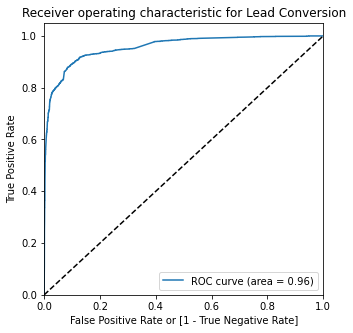

In [292]:
# Plot the ROC
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff

In [293]:
# Find the predicted value for cutoff between 0 and 1
points = [float(n)/10 for n in range(10)]
for i in points:
    y_train_pred_final[i]= y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Score,Prospect Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.096723,9.672257,8425,0,1,0,0,0,0,0,0,0,0,0
1,0,0.096723,9.672257,8341,0,1,0,0,0,0,0,0,0,0,0
2,0,0.091672,9.167238,7376,0,1,0,0,0,0,0,0,0,0,0
3,0,0.096723,9.672257,7414,0,1,0,0,0,0,0,0,0,0,0
4,1,0.999530,99.952953,3521,1,1,1,1,1,1,1,1,1,1,1


In [294]:
# Find accuracy, sensitivity, specificity for each cutoff point defined
find_cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in points:
    cm1 = m.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    find_cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(find_cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.786041  0.950710  0.685961
0.2   0.2  0.883468  0.922306  0.859863
0.3   0.3  0.894047  0.899749  0.890581
0.4   0.4  0.901311  0.871763  0.919269
0.5   0.5  0.896258  0.812030  0.947449
0.6   0.6  0.899100  0.788221  0.966489
0.7   0.7  0.895942  0.763158  0.976644
0.8   0.8  0.880467  0.711362  0.983244
0.9   0.9  0.854571  0.631161  0.990353


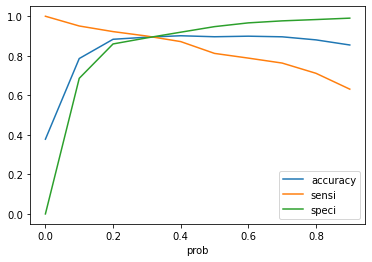

In [295]:
# Plot curves using the above data
find_cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show() # We find that 0.3 is the optimal cutoff

In [296]:
# Make final prediction using optimal cutoff
y_train_pred_final['final_Predicted'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead Score,Prospect Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.096723,9.672257,8425,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.096723,9.672257,8341,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.091672,9.167238,7376,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.096723,9.672257,7414,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.999530,99.952953,3521,1,1,1,1,1,1,1,1,1,1,1,1


In [297]:
# Round converted_prob and lead score to 2 decimal places 
y_train_pred_final[['Converted_prob', 'Lead Score']] = y_train_pred_final[['Converted_prob', 'Lead Score']].apply(lambda x: round(x,2))
y_train_pred_final.head()

,Converted,Converted_prob,Lead Score,Prospect Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.10,9.67,8425,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.10,9.67,8341,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.09,9.17,7376,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.10,9.67,7414,0,1,0,0,0,0,0,0,0,0,0,0
4,1,1.00,99.95,3521,1,1,1,1,1,1,1,1,1,1,1,1


In [298]:
# Accuracy score for improved model
m.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8940470551081636

In [299]:
# Confusion matrix for the data
confusion2 = m.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3508,  431],
       [ 240, 2154]], dtype=int64)

In [300]:
# Repeat the same process of calculating model parameters
TP = confusion2[1,1] # true positives 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [301]:
# Sensitivity of final model(same as recall)
TP/(TP+FN)

0.899749373433584

In [302]:
# Specificity of final model 
TN/(TN+FP)

0.8905813658288906

In [303]:
# False Positive Rate
FP/(TN+FP)

0.10941863417110942

In [304]:
# Positive predictive value(same as precision)
TP/(TP+FP)

0.8332688588007737

In [305]:
# Negative predictive value
TN/(TN+FN)

0.935965848452508

In [306]:
# Precision vs Recall
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

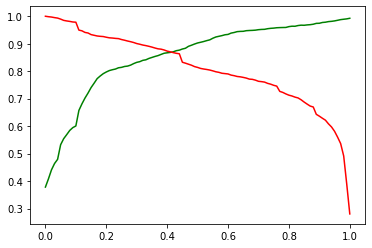

In [307]:
# Plot the precision recall curve. Green one is precision and red one is recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [308]:
# Scaling test set
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email
4462,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5243,0,-0.402157,-0.582031,-0.165214,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4597,0,-0.402157,-0.086672,-0.165214,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4680,0,-1.015121,-0.878510,-1.145788,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5355,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [309]:
# Keeping the columns of our final model
X_test = X_test[rfe_select1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email
4462,0,-0.878510,0,0,0,0,0,0,1,0,0,0,0,1
5243,0,-0.582031,0,0,0,0,0,0,0,0,1,0,0,0
4597,0,-0.086672,0,0,1,0,0,0,0,0,0,1,0,0
4680,0,-0.878510,1,0,0,1,0,0,1,0,0,0,0,0
5355,0,-0.878510,0,0,0,0,0,0,0,0,0,0,0,0


In [310]:
# Add constant for model
X_test_sm = sm.add_constant(X_test)

In [311]:
# Make predictions using our model on test data
y_test_pred = result.predict(X_test_sm)

In [312]:
# Viewing result
y_test_pred[:10]

4462    0.982205
5243    0.011747
4597    0.957715
4680    0.997414
5355    0.096723
7071    0.006040
6314    0.938330
2688    0.999963
6228    0.103350
3014    0.002516
dtype: float64

In [313]:
# Converting array y_test_pred to dataframe
y_test_pred_df = pd.DataFrame(y_test_pred, columns=['Converted_prob'])
y_test_pred_df.head()

,Converted_prob
4462,0.982205
5243,0.011747
4597,0.957715
4680,0.997414
5355,0.096723


In [314]:
# Converting array y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4462,1
5243,0
4597,1
4680,1
5355,0


In [315]:
# Adding Prospect Number to identify the record
y_test_df['Prospect Number'] = y_test_df.index
y_test_df.head()

,Converted,Prospect Number
4462,1,4462
5243,0,5243
4597,1,4597
4680,1,4680
5355,0,5355


In [316]:
# Reset indices of both dataframes before concatenating them
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [317]:
# Creating the combined dataframe
y_pred_combined = pd.concat([y_test_df, y_test_pred_df], axis=1)
y_pred_combined.head()

,Converted,Prospect Number,Converted_prob
0,1,4462,0.982205
1,0,5243,0.011747
2,1,4597,0.957715
3,1,4680,0.997414
4,0,5355,0.096723


In [318]:
# Find the Lead Score
y_pred_combined = y_pred_combined[['Prospect Number','Converted','Converted_prob']]
y_pred_combined['Lead Score'] = y_pred_combined['Converted_prob'].map( lambda x: round(x*100,2))
y_pred_combined.head()

,Prospect Number,Converted,Converted_prob,Lead Score
0,4462,1,0.982205,98.22
1,5243,0,0.011747,1.17
2,4597,1,0.957715,95.77
3,4680,1,0.997414,99.74
4,5355,0,0.096723,9.67


In [319]:
# Assigning final predicted value based on optimal cutoff of 0.3
y_pred_combined['final_Predicted'] = y_pred_combined['Converted_prob'].map(lambda x: 1 if x > 0.3 else 0)
y_pred_combined.head()

,Prospect Number,Converted,Converted_prob,Lead Score,final_Predicted
0,4462,1,0.982205,98.22,1
1,5243,0,0.011747,1.17,0
2,4597,1,0.957715,95.77,1
3,4680,1,0.997414,99.74,1
4,5355,0,0.096723,9.67,0


In [320]:
# Accuracy of test data
m.accuracy_score(y_pred_combined.Converted, y_pred_combined.final_Predicted)

0.8968692449355433

In [321]:
# Confusion matrix of test data
confusion_test = m.confusion_matrix(y_pred_combined.Converted, y_pred_combined.final_Predicted )
confusion_test

array([[1515,  166],
       [ 114,  920]], dtype=int64)

In [322]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [323]:
# Sensitivity of test data(same as recall)
TP/(TP+FN)

0.8897485493230174

In [324]:
# Specificity of test data
TN/(TN+FP)

0.901249256395003

In [325]:
# Precision of test data
m.precision_score(y_pred_combined.Converted , y_pred_combined.final_Predicted)

0.8471454880294659

### Final Conclusion

- Train Data(in percent):
Accuracy = 89.40
Sensitivity = 89.97
Specificity = 89.06
Precision = 83.33

- Test Data(in percent):
Accuracy = 89.67
Sensitivity = 88.97
Specificity = 90.12
Precision = 84.71

These parameters for test and train are close enough. Thus we conclude that our model works well on the test data and that we have a good model for predicting lead conversion.